# 교통사고유형별 발생분석
- 공공 데이터 교통사고 유형, 검색어 : 전국교통사고다발지역
<hr>
  <img src = "!attachment:1800bda1-0935-416a-a5a5-0be31b2a7d2e.png" width=350>
  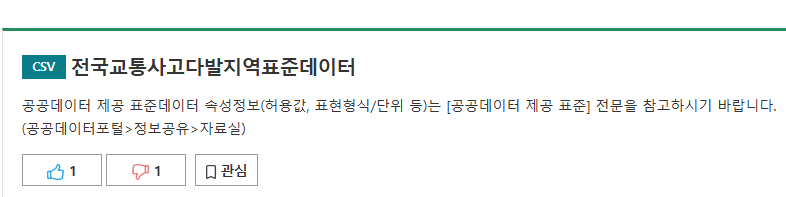
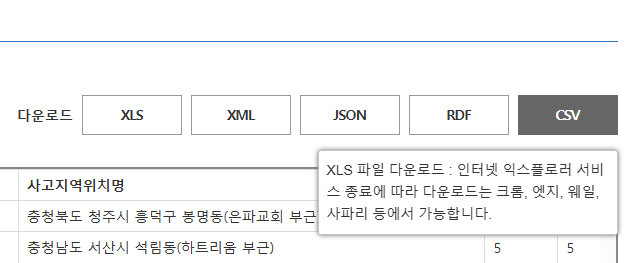

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [2]:
file_path = "./ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,4,0,2,2,0,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6...",2024-09-09,B555234,한국도로교통공단
1,2021030,2020,무단횡단,16044400,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,5,0,3,2,0,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7...",2024-09-09,B555234,한국도로교통공단
2,2021030,2020,무단횡단,16054400,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,6,1,1,4,0,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8...",2024-09-09,B555234,한국도로교통공단
3,2021030,2020,무단횡단,16054400,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,6,0,1,5,0,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8...",2024-09-09,B555234,한국도로교통공단
4,2021030,2020,무단횡단,16054400,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,5,0,3,2,0,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8...",2024-09-09,B555234,한국도로교통공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,2015046,2014,자전거,11710010,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,8,0,0,4,4,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49...",2024-09-09,B555234,한국도로교통공단
14474,2015046,2014,자전거,11710011,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,8,0,4,4,0,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51...",2024-09-09,B555234,한국도로교통공단
14475,2015046,2014,자전거,11710012,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,7,0,4,2,1,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50...",2024-09-09,B555234,한국도로교통공단
14476,2015046,2014,자전거,11710013,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,7,0,2,2,3,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49...",2024-09-09,B555234,한국도로교통공단


In [3]:
ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name='count')
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'})#,'사고건수':'count'})
ori_data

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


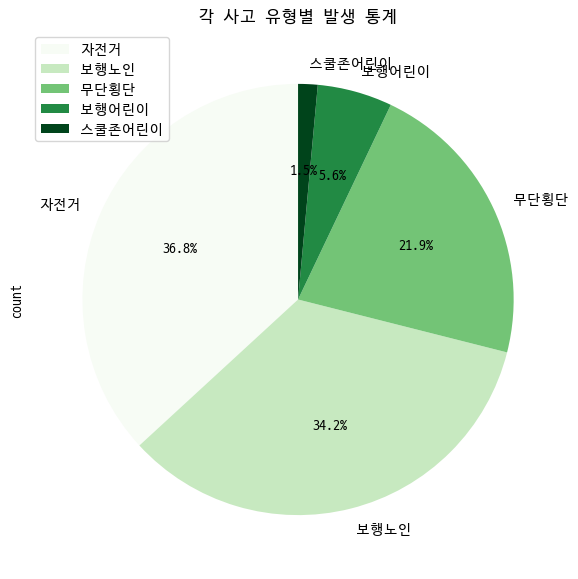

In [4]:
ori_data.plot(
              kind = 'pie',
              y='count',
              labels=ori_data['type'],
              figsize=(7,7),
              startangle=90,
              autopct='%2.1f%%',
              title="각 사고 유형별 발생 통계",
              cmap=matplotlib.cm.Greens)
plt.savefig('./chart/accident.png')
plt.show()

In [5]:
ex_data = ori.copy()
ex2_data = ex_data['사고유형구분']
ex2_data

0        무단횡단
1        무단횡단
2        무단횡단
3        무단횡단
4        무단횡단
         ... 
14473     자전거
14474     자전거
14475     자전거
14476     자전거
14477     자전거
Name: 사고유형구분, Length: 14478, dtype: object

In [6]:
ex_data = ori.copy()
ex_data = ex_data.rename(columns={'사고연도':'year','사고유형구분':'type','사고건수':'accident'})
ex_data
arr_data = list(set(ex_data['type']))
data_list=[]
for t in arr_data:
    data_list.append(ex_data[ex_data['type']==t])
print(arr_data,data_list)

['보행노인', '보행어린이', '무단횡단', '스쿨존어린이', '자전거'] [       사고지역관리번호  year  type      위치코드   사고다발지역시도시군구  \
47      2019036  2018  보행노인  11110001    서울특별시 종로구1   
144     2020027  2019  보행노인  51110003  강원특별자치도 춘천시3   
145     2020027  2019  보행노인  51110004  강원특별자치도 춘천시4   
146     2020027  2019  보행노인  51110005  강원특별자치도 춘천시5   
147     2020027  2019  보행노인  51130001  강원특별자치도 원주시1   
...         ...   ...   ...       ...           ...   
13697   2017029  2016  보행노인  47290002     경상북도 경산시2   
13714   2017029  2016  보행노인  47290001     경상북도 경산시1   
13731   2017029  2016  보행노인  47280002     경상북도 문경시2   
13765   2017029  2016  보행노인  47280001     경상북도 문경시1   
13799   2017029  2016  보행노인  47250001     경상북도 상주시1   

                            사고지역위치명  accident  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
47         서울특별시 종로구 낙원동(낙원지하상가 부근)         9     9     0     7     1       1   
144       강원특별자치도 춘천시 옥천동(한림대학교 부근)         3     3     0     2     1       0   
145    강원특별자치도 춘천시 후평동(정은아헤어컬렉션 부근)         3     3 

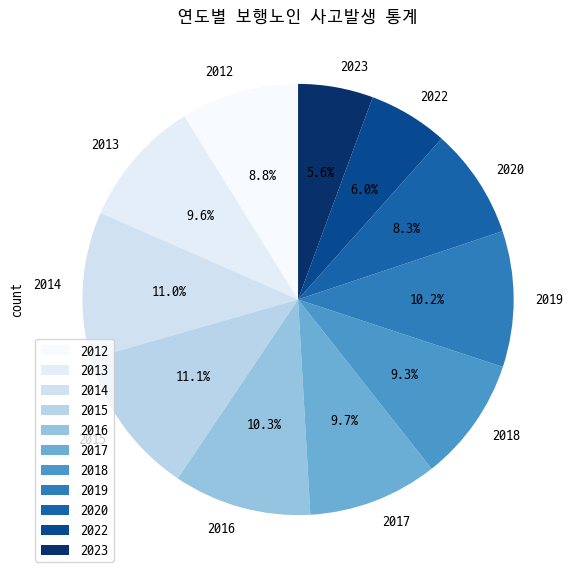

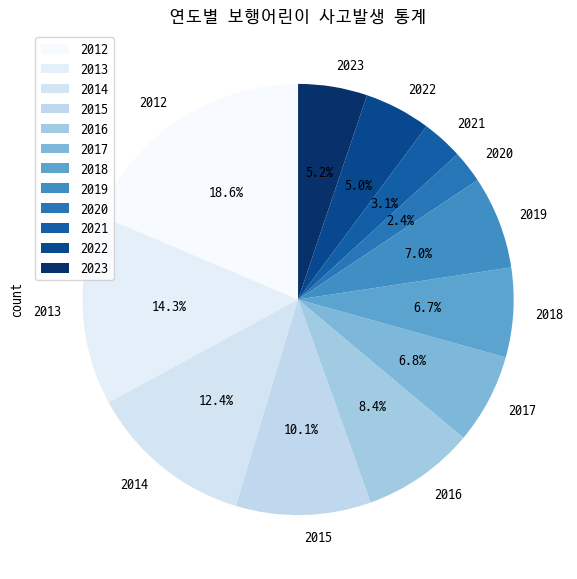

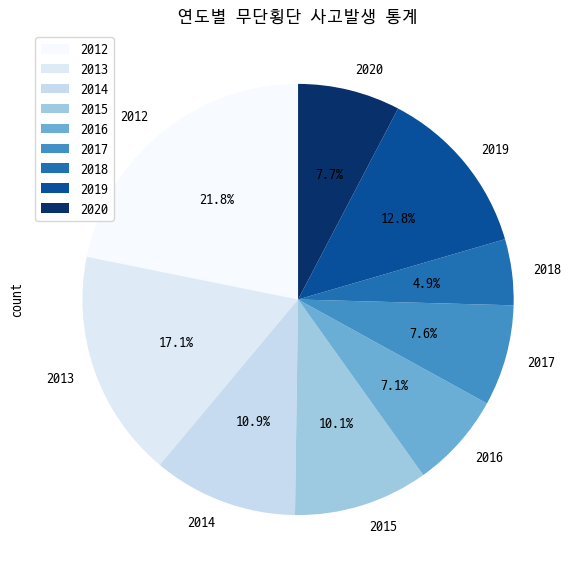

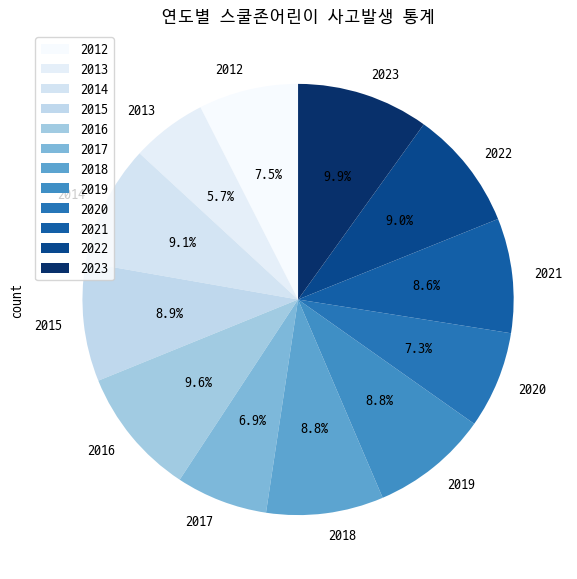

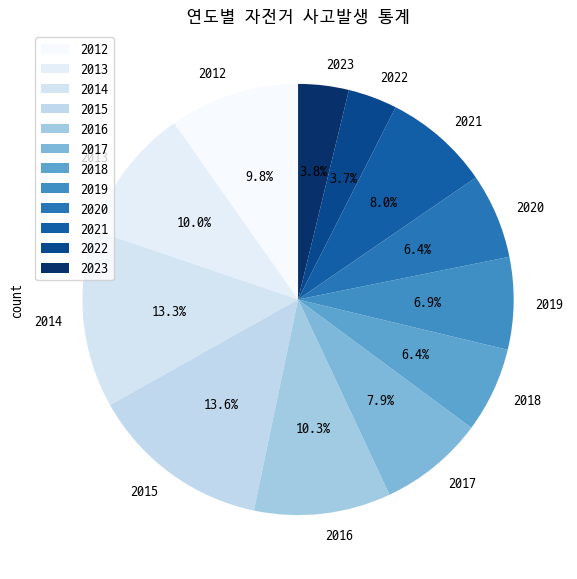

In [7]:
total_list = []

for d in data_list:
    result = d.groupby('year')["accident"].sum().reset_index(name='count')
    total_list.append(result)
# print(arr_data,total_list)

for i in range(len(arr_data)):
    total_list[i].plot(
        kind = 'pie',
        y = 'count',
        labels =total_list[i]['year'],
        figsize=(7,7),
        startangle=90,
        autopct = '%.1f%%',
        title = f'연도별 {arr_data[i]} 사고발생 통계',
        cmap = matplotlib.cm.Blues
    )
    plt.savefig(f"./chart/chart{i}.png")
    plt.show()

In [8]:
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex ;flex-wrap:wrap;width:1000px;">
    <div style="flex: 1; min-width:300px";>
        <div style="padding: 10px 0 10px 80px;">
        <h3>Data Table</h3>
        {ori_data.to_html(index=False)}
        </div>
    </div>"""
for v in range(len(arr_data)):
    html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
            <h3>Pie Chart{v+1}</h3>
            <img src="./chart/chart{v}.png" alt="Pie Chart">
        </div>"""
html+=f"""</div> """
    # HTML 표시
# print(html)
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


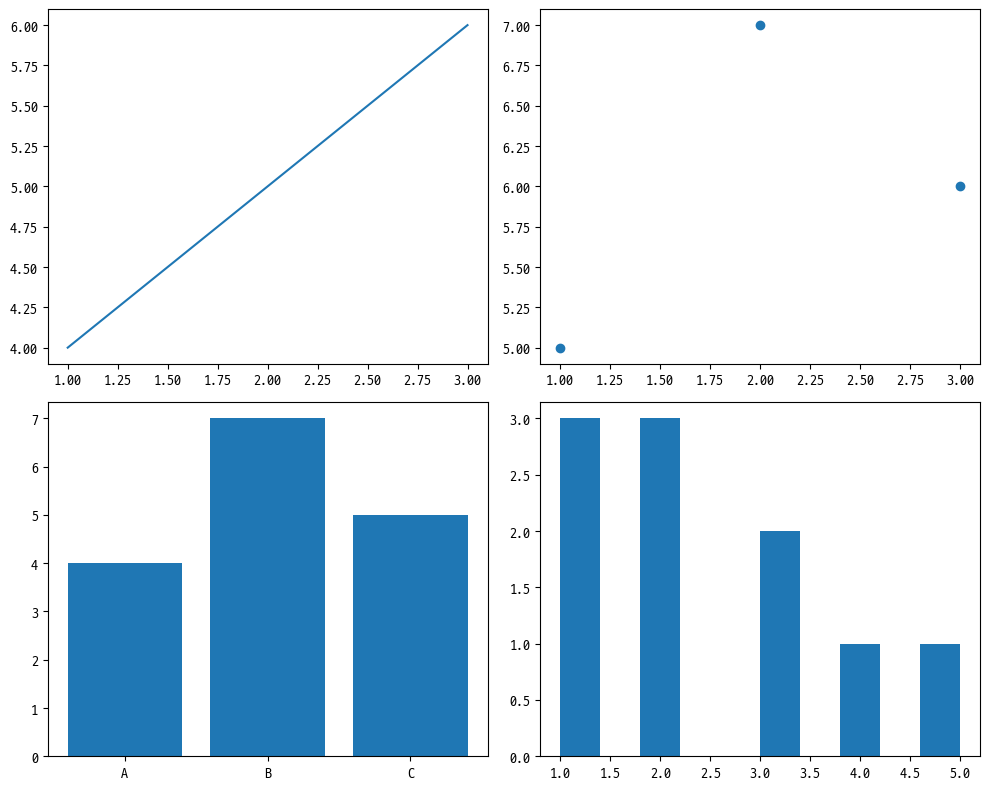

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(10,8)) # 2 x 2 서브플롯 생성

axs[0,0].plot([1,2,3],[4,5,6])
axs[0,1].scatter([1,2,3],[5,7,6])
axs[1,0].bar(['A','B','C'],[4,7,5,])
axs[1,1].hist([1,1,2,3,4,5,1,2,3,2],bins=10)
plt.tight_layout()
plt.show()

In [10]:
map_data = ori.copy()
map_datab

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,4,0,2,2,0,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6...",2024-09-09,B555234,한국도로교통공단
1,2021030,2020,무단횡단,16044400,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,5,0,3,2,0,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7...",2024-09-09,B555234,한국도로교통공단
2,2021030,2020,무단횡단,16054400,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,6,1,1,4,0,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8...",2024-09-09,B555234,한국도로교통공단
3,2021030,2020,무단횡단,16054400,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,6,0,1,5,0,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8...",2024-09-09,B555234,한국도로교통공단
4,2021030,2020,무단횡단,16054400,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,5,0,3,2,0,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8...",2024-09-09,B555234,한국도로교통공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,2015046,2014,자전거,11710010,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,8,0,0,4,4,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49...",2024-09-09,B555234,한국도로교통공단
14474,2015046,2014,자전거,11710011,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,8,0,4,4,0,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51...",2024-09-09,B555234,한국도로교통공단
14475,2015046,2014,자전거,11710012,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,7,0,4,2,1,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50...",2024-09-09,B555234,한국도로교통공단
14476,2015046,2014,자전거,11710013,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,7,0,2,2,3,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49...",2024-09-09,B555234,한국도로교통공단


In [11]:
!pip install folium
!pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
